In [2]:
import sys
import pandas as pd
import numpy as np
import cufflinks as cf
from sortedcontainers import SortedListWithKey
cf.go_offline()
sys.path.append('../../')

import bitcoin.storage.snapshots as ss

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
yesterday = pd.datetime.now() - pd.offsets.Day(60)
spread = pd.read_sql('select * from {} where time > "{}"'.format(ss.SPREAD_TBL_NAME, yesterday), con=ss.ENGINE, index_col='time')
spread.index = spread.index + pd.DateOffset(hours=4)
print spread.shape
spread.tail()

(1187096, 6)


,gdax_bid,gdax_ask,gdax_id,bitstamp_bid,bitstamp_ask,bitstamp_id
time,,,,,,
2017-08-21 03:08:08,4125.03,4125.96,3871739992,4085.45,4097.14,4085.45
2017-08-21 03:08:10,4125.03,4125.92,3871740128,4085.45,4097.14,4085.45
2017-08-21 03:08:11,4125.03,4125.88,3871740261,4085.45,4097.14,4085.45
2017-08-21 03:08:12,4125.03,4125.85,3871740409,4085.45,4097.14,4085.45
2017-08-21 03:08:14,4125.03,4125.83,3871740551,4085.53,4094.09,4085.53


In [6]:
spread.head()

,gdax_bid,gdax_ask,gdax_id,bitstamp_bid,bitstamp_ask,bitstamp_id
time,,,,,,
2017-07-13 05:36:00,2385.03,2385.04,3567898504,2376.87,2377.99,2376.87
2017-07-13 05:36:02,2385.03,2385.04,3567898702,2376.87,2377.99,2376.87
2017-07-13 05:36:04,2385.03,2385.04,3567898856,2376.87,2377.99,2376.87
2017-07-13 05:36:06,2385.03,2385.04,3567899039,2376.87,2377.99,2376.87
2017-07-13 05:36:08,2385.03,2385.04,3567899213,2376.87,2377.99,2376.87


In [10]:
data = spread.as_matrix()

In [17]:

def compute_profits(spread_requirement):
    bitstamp_fees = 0.0024
    gdax_cash = 0
    gdax_coins = 0
    bitstamp_cash = 0
    bitstamp_coins = 1
    buy = False
    sell = False
    for row in range(len(data)):
        if data[row, 3] * (1 - bitstamp_fees) > data[row, 1] + spread_requirement and bitstamp_coins == 1:
            gdax_coins += 1
            gdax_cash -= data[row, 1]
            bitstamp_cash += data[row, 3] * (1 - bitstamp_fees)
            bitstamp_coins -= 1
        if data[row, 0] > data[row, 4] * (1 + bitstamp_fees) + spread_requirement and gdax_coins == 1:
            gdax_coins -= 1
            gdax_cash += data[row, 0]
            bitstamp_cash -= data[row, 4] * (1 + bitstamp_fees)
            bitstamp_coins += 1
    print("total cash", gdax_cash + bitstamp_cash)
    print("total coins", gdax_coins + bitstamp_coins)
    return gdax_cash + bitstamp_cash

In [21]:
import time

t = time.time()
compute_profits(10)
print(time.time() - t)

('total cash', 836.1753760000097)
('total coins', 1)
1.11244606972


In [18]:
results = []
for i in range(1000):
    spread_requirement = i / 10.0
    profit = compute_profits(spread_requirement)
    results.append((spread_requirement, profit))

('total cash', 1024.5806480000497)
('total coins', 1)
('total cash', 1049.838504000049)
('total coins', 1)
('total cash', 1099.0831600000479)
('total coins', 1)
('total cash', 1097.3234800000446)
('total coins', 1)
('total cash', 1115.845864000044)
('total coins', 1)
('total cash', 1132.1950880000445)
('total coins', 1)
('total cash', 1136.7649200000442)
('total coins', 1)
('total cash', 1175.2970320000454)
('total coins', 1)
('total cash', 1187.308520000046)
('total coins', 1)
('total cash', 1200.9311520000456)
('total coins', 1)
('total cash', 1200.0430560000423)
('total coins', 1)
('total cash', 1224.2263280000416)
('total coins', 1)
('total cash', 1229.3192480000407)
('total coins', 1)
('total cash', 1224.7127920000426)
('total coins', 1)
('total cash', 1219.1757840000432)
('total coins', 1)
('total cash', 1241.8990320000444)
('total coins', 1)
('total cash', 1258.7268960000424)
('total coins', 1)
('total cash', 1233.0361680000433)
('total coins', 1)
('total cash', 1207.65670400003

('total cash', 698.1757760000078)
('total coins', 1)
('total cash', 698.2757760000077)
('total coins', 1)
('total cash', 698.2954880000075)
('total coins', 1)
('total cash', 699.6784480000078)
('total coins', 1)
('total cash', 699.868568000008)
('total coins', 1)
('total cash', 701.0476000000076)
('total coins', 1)
('total cash', 701.1680800000072)
('total coins', 1)
('total cash', 701.7931920000074)
('total coins', 1)
('total cash', 701.853120000007)
('total coins', 1)
('total cash', 703.2198320000066)
('total coins', 1)
('total cash', 703.2198320000066)
('total coins', 1)
('total cash', 704.6231920000068)
('total coins', 1)
('total cash', 704.6231920000068)
('total coins', 1)
('total cash', 670.5176720000059)
('total coins', 1)
('total cash', 670.6179120000061)
('total coins', 1)
('total cash', 676.4357200000063)
('total coins', 1)
('total cash', 681.065688000006)
('total coins', 1)
('total cash', 681.8876560000062)
('total coins', 1)
('total cash', 681.8876560000062)
('total coins',

('total cash', 350.62981600000194)
('total coins', 1)
('total cash', 350.62981600000194)
('total coins', 1)
('total cash', 354.73981600000207)
('total coins', 1)
('total cash', 354.73981600000207)
('total coins', 1)
('total cash', 354.73981600000207)
('total coins', 1)
('total cash', 354.73981600000207)
('total coins', 1)
('total cash', 354.799816000002)
('total coins', 1)
('total cash', 366.66927200000237)
('total coins', 1)
('total cash', 366.66927200000237)
('total coins', 1)
('total cash', 366.66927200000237)
('total coins', 1)
('total cash', 377.45653600000196)
('total coins', 1)
('total cash', 377.45653600000196)
('total coins', 1)
('total cash', 377.8800080000017)
('total coins', 1)
('total cash', 377.9600080000016)
('total coins', 1)
('total cash', 378.36000800000124)
('total coins', 1)
('total cash', 378.36000800000124)
('total coins', 1)
('total cash', 380.3800080000017)
('total coins', 1)
('total cash', 380.4600080000016)
('total coins', 1)
('total cash', 380.7800080000013)


('total cash', 189.8073119999999)
('total coins', 1)
('total cash', 189.8073119999999)
('total coins', 1)
('total cash', 189.8073119999999)
('total coins', 1)
('total cash', 189.8073119999999)
('total coins', 1)
('total cash', 189.8073119999999)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.63292)
('total coins', 1)
('total cash', 191.69291999999996)
('total coins', 1)
('total cash', 196.35512000000017)
('total coins', 1)
('total cash', 196.35512000000017)
('total coins', 1)
('total cash', 196.42937600000005)
('total coins', 1)
('total cash', 196.81932000000052)
('total coins', 1)
('total cash', 196.81932000000052)
('total coins', 1)
('total cash', 196.81932000000052)
('total coins', 1)
('total cash', 197.87400000000025)
('total coins', 1)
('total cash', 197.87400000000025

('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.26320000000032)
('total coins', 1)
('total cash', 163.263200000

KeyboardInterrupt: 

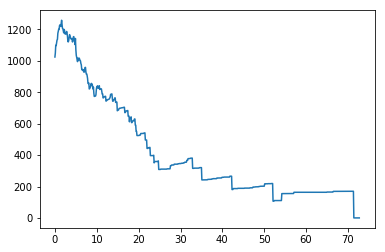

In [20]:
%matplotlib inline
import pylab as plt
plt.plot([x for x, y in results], [y for x, y in results])

In [4]:
del spread['bitstamp_id']
del spread['gdax_id']
spread = spread.dropna()
print(spread.dtypes)

gdax_bid        float64
gdax_ask        float64
bitstamp_bid    float64
bitstamp_ask    float64
dtype: object


In [5]:
train = spread[:len(spread) * 3 / 4]
test = spread[len(spread) * 3 / 4:]

In [6]:
LONGER_SPREAD_GAP = 20
def featurize(spreads):
    spread_changes = spread.pct_change(LONGER_SPREAD_GAP)
    spread_changes["bid_diff"] = spread['gdax_bid'][1:] / spread['bitstamp_bid'][1:] - 1
    spread_changes["ask_diff"] = spread['gdax_bid'][1:] / spread['bitstamp_bid'][1:] - 1
    longer_spread_changes = spread.pct_change(LONGER_SPREAD_GAP)
    return spread_changes, longer_spread_changes

In [7]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
import random

def sample(data, len_history=1):
    spread_changes, longer_spread_changes = featurize(data)
    assert (spread_changes.axes[0] == longer_spread_changes.axes[0]).all()
    num_samples = 2 * len(data)
    upper_bd = len(spread_changes) - len_history - 1 - LONGER_SPREAD_GAP
    xes = []
    yes = []
    spread_changes = spread_changes.values
    longer_spread_changes = longer_spread_changes.values
    for _ in range(num_samples):
        index = random.randint(LONGER_SPREAD_GAP, upper_bd - 1)
        xes.append(spread_changes[index].flatten().tolist())
        yes.append(longer_spread_changes[index + len_history + LONGER_SPREAD_GAP].tolist())
    return xes, yes

In [8]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
model = GBR(loss='lad', criterion='mae', max_depth=300, n_estimators=40, min_samples_leaf=300, subsample=0.1)

In [9]:
print("A")

A


In [10]:
import xgboost as xgb

/Users/vidurjoshi/anaconda/envs/bitcoin-bot/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [11]:
train_xes, train_yes = sample(train)
train_yes = [x[1] for x in train_yes]
train_data = xgb.DMatrix(train_xes, label=train_yes)

In [12]:
test_xes, test_yes = sample(test)
test_yes = [x[1] for x in test_yes]
test_data = xgb.DMatrix(test_xes, label=test_yes)

In [13]:
print(train_data.num_row(), test_data.num_row())
print(test_yes == train_yes)
print(len(test_xes), len(test_yes), len(train_xes), len(train_yes))

(1635562L, 545188L)
False
(545188, 545188, 1635562, 1635562)


In [ ]:
param = {
    'max_depth':3, 
    'silent':0, 
    'objective':'reg:linear',
    'nthread': 6,
    'min_child_weight': 100,
    'subsample': 0.1
}
evallist  = [(train_data,'train'), (test_data,'eval')]

In [ ]:
#bst = xgb.train(param, train_data, num_boost_round=200000, evals=evallist, early_stopping_rounds=20, obj=gradient, feval=loss)
# Date and time will also make good features. 
# Maybe even past hour long volume on both exchanges.

bst = model.fit(train_xes, train_yes)

In [ ]:
preds = bst.predict(test_xes)

In [ ]:
options = []
for x, y in zip(preds, test_yes):
    if x * 100 < 0.0:
        options.append(y)

In [ ]:
import numpy as np
print(np.mean(options), np.percentile(options, 90), np.percentile(options, 10))

In [ ]:
import numpy as np
print(np.mean(options), np.percentile(options, 90), np.percentile(options, 10))

In [27]:
# user define objective function, given prediction, return gradient and second order gradient
# this is log likelihood loss
def gradient(preds, dtrain):
    labels = dtrain.get_label()
    should_increase = labels > preds
    should_decrease = preds > labels
    grad = 1 * should_increase - 1 * should_decrease
    hess = 0
    return -grad, np.zeros(len(preds))

# user defined evaluation function, return a pair metric_name, result
# NOTE: when you do customized loss function, the default prediction value is margin
# this may make builtin evaluation metric not function properly
# for example, we are doing logistic loss, the prediction is score before logistic transformation
# the builtin evaluation error assumes input is after logistic transformation
# Take this in mind when you use the customization, and maybe you need write customized evaluation function
def loss(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'error', np.sum(np.abs(labels - preds)) / len(labels)